realized that due to the yearly CO2 concentration-fluctuation, and the yearly summer winter cycle that we would prob not be able to find correct correlations while using yearly data, maybe we should normalise according to month. i will first test if the CO2 concentration is actually different each month. 

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import linregress
import os

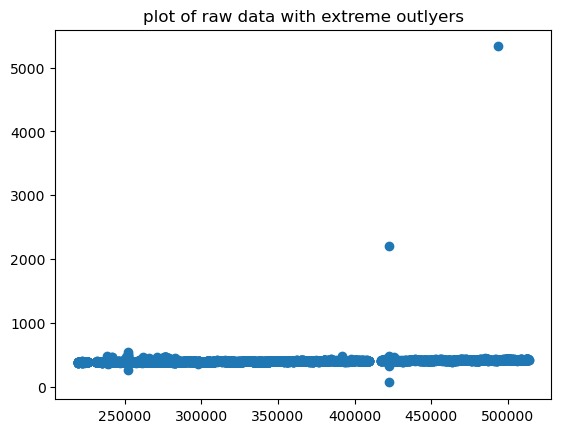

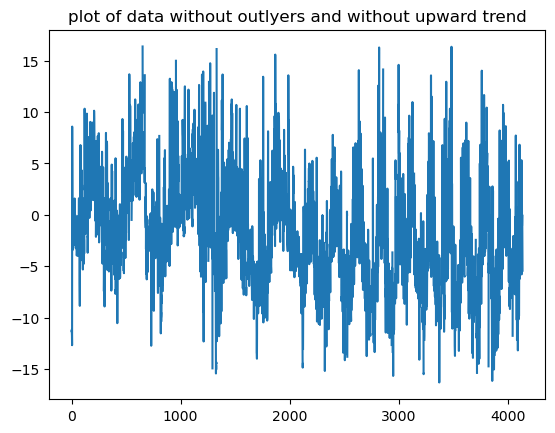

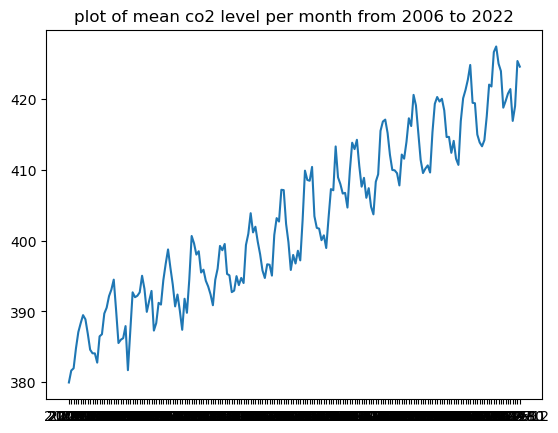

In [11]:
# cleaning the CO2 data
os.chdir("..")
os.chdir("dataset")
co2 = "CO2_data_raw.txt"

co2_df = pd.read_csv(co2, header= 148, sep = " ") # header lines given in original txt file
plt.scatter(co2_df["event_number"], co2_df["value"])
plt.title("plot of raw data with extreme outlyers")
plt.show()  # raw data


slope, intercept, _, _, _ = linregress(co2_df["event_number"], co2_df["value"]) # getting linear regresion data of uncleaned datafile
trend = slope * co2_df["event_number"] + intercept
detrended_data = co2_df["value"] - trend # getting co2 data withoud upward trend
detrended_data_clean = detrended_data[(np.abs(stats.zscore(detrended_data)) < 0.2)] # removing outlyers from detrended data


#creating new df with the detreded data and cleaned data to regain the order of the original data within the cleaned data
new_df = pd.concat([detrended_data, detrended_data_clean], axis = 1) 

#plotting raw data without outlyers
new_df.rename(columns = {0 : "old", 1 : "new"}, inplace = True)#renaming columns
plt.plot(new_df.index, new_df["new"])
plt.title("plot of data without outlyers and without upward trend")
plt.show()

#plotting per month mean of original data without outlyers and with original trend
cleaned_data = detrended_data_clean + trend # replotting new plot without outlyers
co2_df["co2_correct"] = pd.concat([cleaned_data], axis = 1)#concat the new list without the outlyers
mean_df = pd.DataFrame  
mean_df= co2_df.groupby(["year", "month" ])["co2_correct"].mean() #calc mean per year and month
x_labels = mean_df.index.map(lambda x: f"{x[0]}-{x[1]}") #creating x labels for plot
plt.plot(x_labels, mean_df)
plt.title("plot of mean co2 level per month from 2006 to 2022")
plt.show()

#saving as csv
os.chdir("..")
os.chdir("dataset")
mean_df.to_csv('meanCO2_values.csv', index=True) 

In [12]:
#checking wether temperature difference is the same over entire state
os.chdir("..")
os.chdir("dataset")

#reading fires csv
df_fire = pd.read_csv("texas_fires_drought.csv")

#reading drought csv and creating new columns for eacht year, day and month 
df_drought = pd.read_csv("drought_county_tx.csv")
df_drought["MapDate"] = df_drought["MapDate"].astype(str)
df_drought["year"] = df_drought["MapDate"].str.slice(0, 4)
df_drought["month"] = df_drought["MapDate"].str.slice(4,6) # the date values are now string!!!
df_drought["day"] = df_drought["MapDate"].str.slice(6,8)

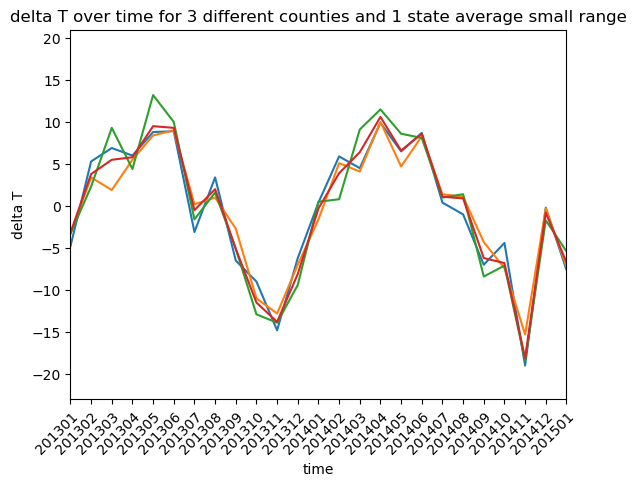

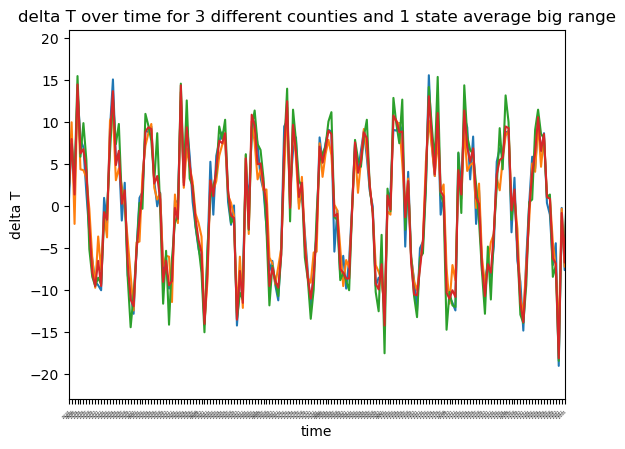

In [13]:
os.chdir("..")
os.chdir("dataset")

# creating df of average TX and three seperated counties within texas
df_texas = pd.read_csv("texas_meanT.csv", header = 4)
df_pecos = pd.read_csv("pecos_meanT.csv", header = 4)
df_harris = pd.read_csv("harris_meanT.csv", header = 4)
df_floyd = pd.read_csv("floyd_meanT.csv", header = 4)

#creating delta T df's
df_texas["delta"] = df_texas["Value"].diff()
df_pecos["delta"] = df_pecos["Value"].diff()
df_harris["delta"] = df_harris["Value"].diff()
df_floyd["delta"] = df_floyd["Value"].diff()

df_pecos["Date"] =  df_pecos["Date"].astype(str)
df_harris["Date"] =  df_harris["Date"].astype(str)
df_floyd["Date"] =  df_floyd["Date"].astype(str)
df_texas["Date"] =  df_texas["Date"].astype(str)

#plotting each
plt.plot(df_texas["Date"], df_pecos["delta"])
plt.plot(df_texas["Date"], df_harris["delta"])
plt.plot(df_texas["Date"], df_floyd["delta"])
plt.plot(df_texas["Date"], df_texas["delta"])

plt.title("delta T over time for 3 different counties and 1 state average small range")
plt.xlabel("time")
plt.xticks(df_texas["Date"], labels=df_texas["Date"], rotation=45, rotation_mode="anchor", ha="right", size = 10)
plt.xlim("201301", "201501")
plt.ylabel("delta T")
plt.show()


#plotting again but zoomed out
plt.plot(df_texas["Date"], df_pecos["delta"])
plt.plot(df_texas["Date"], df_harris["delta"])
plt.plot(df_texas["Date"], df_floyd["delta"])
plt.plot(df_texas["Date"], df_texas["delta"])

plt.title("delta T over time for 3 different counties and 1 state average big range")
plt.xlabel("time")
plt.xticks(df_texas["Date"], labels=df_texas["Date"], rotation=45, rotation_mode="anchor", ha="right", size = 2)
plt.xlim("200101", "201501")
plt.ylabel("delta T")
plt.show()


